# Import paket yang dibuthkan

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf
import pandas as pd
import glob 
import cv2 as cv
import os
import numpy as np
from PIL import Image,ImageFile
from PIL import ImageOps
from random import shuffle
import pickle
import warnings
import joblib
warnings.filterwarnings('ignore')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

If use in local dont use it, because colab must zip data so that the data is not too large when uploaded

Using Google Colab :
- upload dataset zip 
- unzip dataset  

# Unzip dataset

In [ ]:
!unzip  Label_data.zip

# Load data gambar

In [9]:
anemia_images=[] #Load data Anemia
for dir in glob.glob('ANEMIA'):
    for image in glob.glob(os.path.join(dir,"*png")):
        img=cv.imread(image)
        anemia_images.append(img)

In [10]:
plot_anemia_images=np.array(anemia_images)

In [12]:
normal_images=[] #Load data Normal
for dir in glob.glob('NORMAL'):
    for image in glob.glob(os.path.join(dir,"*png")):
        img=cv.imread(image)
        normal_images.append(img)

In [13]:
plot_normal_images=np.array(normal_images)

# Explore data

In [14]:
print("Total Gambar Anemia ->",len(anemia_images))
print("Total Gambar Normal ->",len(normal_images))

Total Gambar Anemia -> 74
Total Gambar Normal -> 144


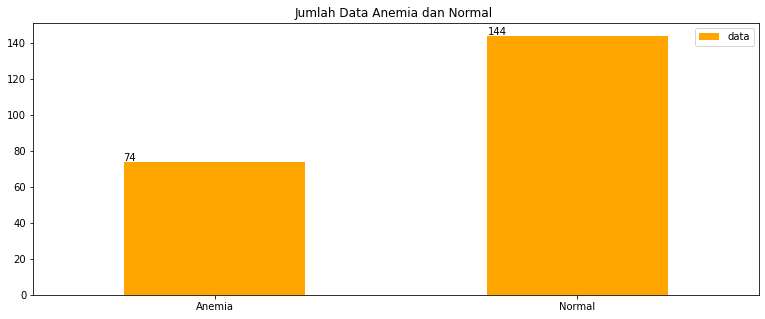

In [17]:
import pandas as pd

# visualisasi jumlah data training dan data validation
data= [len(anemia_images),len(normal_images)]

index = ['Anemia','Normal']
data_am = pd.DataFrame({'data': data}, index=index)
ax = data_am.plot.bar(rot=0, color=['orange'], figsize=(13,5))
ax.set_title("Jumlah Data Anemia dan Normal ")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.savefig("Data.png")


## Visualize data image

In [7]:
def load_images(images):
    # Tampilkan Gambar
    fig = plt.figure(figsize=(15,15))
    for i in range(5):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.title("Image data")
        plt.grid(False)
        plt.imshow(images[i],cmap=plt.cm.binary)
    plt.show()

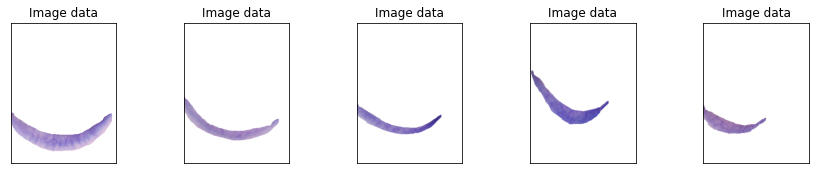

In [8]:
#  tampilkan anemia images
load_images(plot_anemia_images)

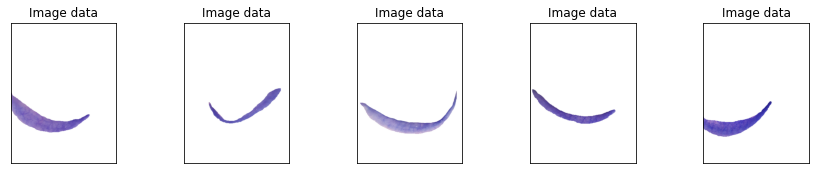

In [9]:
#  tampilkan normal images
load_images(plot_normal_images)

# Augmentasi

In [11]:
import albumentations as alb

In [12]:
aug=alb.Compose([
                alb.HorizontalFlip(p=0.5),
                alb.RandomBrightnessContrast(p=0.2),
                alb.RandomContrast(p=0.2)
                         ])

### Save Augmentation image

#### Save normal image

Make directory for Save augmented image

In [13]:
from functools import partial

In [14]:
list = ('train/NORMAL','train/ANEMIA')

concat_root_path = partial(os.path.join)
make_directory = partial(os.makedirs, exist_ok=True)
  
for path_items in map(concat_root_path, list):
    make_directory(path_items)

In [15]:
list = ('test/NORMAL','test/ANEMIA')

concat_root_path = partial(os.path.join)
make_directory = partial(os.makedirs, exist_ok=True)
  
for path_items in map(concat_root_path, list):
    make_directory(path_items)

In [55]:
import shutil

In [107]:
#  JANGAN DI RUN KARENA DAPAT MENGAHPUS FOLDER YANG SUDAH DIBUAT
# DI RUN JIKA HANYA TERJADI KESALAHAN
# shutil.rmtree('test')
# shutil.rmtree('train')

In [16]:
for image_load in ['NORMAL'] :
    for label in ['NORMAL']:
        for partition in ['train','test']: 
            for image in os.listdir(os.path.join( 'NORMAL')):
                img = cv.imread(os.path.join( image_load,  image))
                try: 
                    for x in range(60):
                        augmented = aug(image=img)
                        cv.imwrite(os.path.join(partition,label, f'{image.split(".")[0]}.{x}.jpg'))
                except Exception as e:
                    print(e)

#### Save anemia image

In [17]:
for image_load in ['ANEMIA'] :
    for label in ['ANEMIA']:
        for partition in ['train','test']: 
            for image in os.listdir(os.path.join(image_load)):
                img = cv.imread(os.path.join(image_load,  image))
                try: 
                    for x in range(60):
                        augmented = aug(image=img)
                        cv.imwrite(os.path.join(partition,label, f'{image.split(".")[0]}.{x}.jpg'))
                except Exception as e:
                    print(e)

# split data

In [2]:
train_dir = os.path.join('train/')
test_dir = os.path.join('test/')

In [84]:
train_generator = tf.keras.utils.image_dataset_from_directory(
      train_dir,  # This is the source directory for training images
        image_size=(256, 256),  # All images will be resized to 256x256
        class_names=['NORMAL','ANEMIA'],
        validation_split=0.1, 
        subset='training', # Menjadi data training sesuai aturan library Tensorflow yang mengharuskan subset training
        seed=5, # Seed yaitu lakukan random shuffle dan transformation
        label_mode='binary'  # Use binary labels
        )

validation_generator = tf.keras.utils.image_dataset_from_directory(
        test_dir ,  # This is the source directory for training images
        image_size=(256, 256),  # All images will be resized to 256x256
        class_names=['NORMAL','ANEMIA'], # Inisalisasi label yang sudah dilakukan pelabelan manual
        validation_split=0.2, 
        subset='validation',  # Menjadi data validasi sesuai aturan library Tensorflow yang mengharuskan subset validation
        seed=5, # Seed yaitu lakukan random shuffle dan transformation
        label_mode='binary',  # Use binary labels
       )

Found 13080 files belonging to 2 classes.
Using 11772 files for training.
Found 13080 files belonging to 2 classes.
Using 2616 files for validation.


Visualisasi data setelah augmentasi

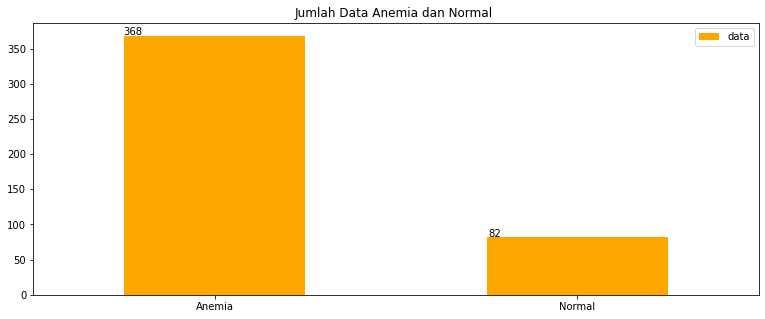

In [89]:
import pandas as pd

# visualisasi jumlah data training dan data validation
data= [len(train_generator),len(validation_generator)]

index = ['Anemia','Normal']
data_am = pd.DataFrame({'data': data}, index=index)
ax = data_am.plot.bar(rot=0, color=['orange'], figsize=(13,5))
ax.set_title("Jumlah Data Anemia dan Normal ")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.savefig("Data_aug_ready_cnn.png")


### Latih CNN

In [88]:
model = tf.keras.models.Sequential([
tf.keras.layers.Rescaling(1./255,input_shape=(256,256,3)),

    # layar konvolusi pertama
tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#Layar Konvolusi Kedua
tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#Layar Konvolusi Ketiga
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#Layar Konvolusi Keempat
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),


#Layar Konvolusi Kelima
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

#Lakukan Flatten
tf.keras.layers.Flatten(),

#Lakukan Fully connected layer
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
   
])

In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        1

In [6]:
import pydot 

In [8]:
tf.keras.utils.plot_model(model,to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [91]:
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [92]:
history=model.fit(
         train_generator,
                steps_per_epoch=10,  # berapa step yang akan dieksekusi pada setiap epoch
                epochs=35,
                validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
                validation_steps=10,  # berapa batch yang akan dieksekusi pada setiap epoch
                )

Epoch 1/35
10/10 [==============================] - 13s 1s/step - loss: 0.6378 - accuracy: 0.6656 - val_loss: 0.5730 - val_accuracy: 0.7344
Epoch 2/35
10/10 [==============================] - 8s 813ms/step - loss: 0.5771 - accuracy: 0.7250 - val_loss: 0.5328 - val_accuracy: 0.7312
Epoch 3/35
10/10 [==============================] - 8s 793ms/step - loss: 0.6069 - accuracy: 0.6781 - val_loss: 0.5774 - val_accuracy: 0.7094
Epoch 4/35
10/10 [==============================] - 8s 828ms/step - loss: 0.5391 - accuracy: 0.7344 - val_loss: 0.5508 - val_accuracy: 0.7312
Epoch 5/35
10/10 [==============================] - 8s 843ms/step - loss: 0.5455 - accuracy: 0.7469 - val_loss: 0.4844 - val_accuracy: 0.7375
Epoch 6/35
10/10 [==============================] - 8s 859ms/step - loss: 0.4789 - accuracy: 0.7625 - val_loss: 0.4896 - val_accuracy: 0.7469
Epoch 7/35
10/10 [==============================] - 8s 839ms/step - loss: 0.4324 - accuracy: 0.7688 - val_loss: 0.4729 - val_accuracy: 0.8250
Epoch 8/

Evaluation

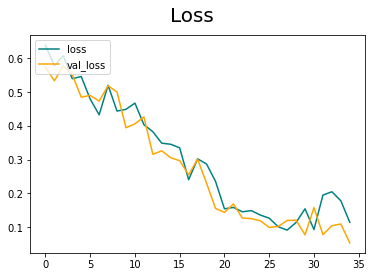

In [93]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.savefig("Loss_And_valLoss.png")

plt.show()

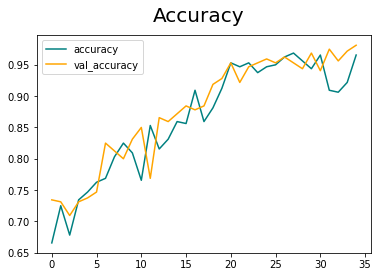

In [94]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.savefig("acc_And_vaAcc.png")
plt.show()

Tidak ada, adanya overfitt

In [115]:
model.evaluate(validation_generator)

82/82 [==============================] - 14s 171ms/step - loss: 0.0569 - accuracy: 0.9824


[0.056873541325330734, 0.9824159145355225]

Save model

In [23]:
os.mkdir('model')

In [110]:
from tensorflow.keras.models import load_model
modelku=model.save(os.path.join('model','imageclassifier.h5'))

In [112]:
model= tf.keras.models.load_model('model/imageclassifier.h5')

# Predicted 

In [72]:
from tensorflow.keras.preprocessing import image

1/1 [==============================] - 0s 86ms/step
[[3.122623e-05]]
NORMAL/T_90_20190614_083843_palpebral.png
 Normal


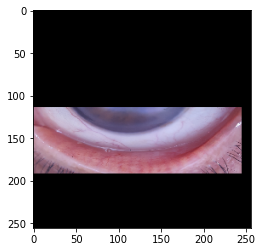

In [113]:
path = 'NORMAL/T_90_20190614_083843_palpebral.png'

 
img = image.load_img(path, target_size=(256, 256))
x = image.img_to_array(img)
plt.imshow(x/255.)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes)
if classes>=0.9:
    print(path + "\n Anemia")
else :
    print(path + "\n Normal")
